In [1]:
####### FIX ########
# Line In 33, In 39, In 42


# Background Information:
#    NYC is split into 5 boroughs
#    Schools in NYC are split into several school districts
#    Not all schools in datasets are high schools (cleaning required)
#    Each school in NYC has a unique code, DBN (District Borough Number)
#    We can utilize the district mapping data to plot district-by-district differences by aggregating district data

In [2]:
# Loops through each data file
# Reads file into Pandas DataFrame
# Puts DataFrames into Python Directory

In [3]:
import pandas
import pandas as pd
import numpy as np

files = ["ap_2010.csv", "class_size.csv", "demographics.csv", "graduation.csv", "hs_directory.csv","math_test_results.csv","sat_results.csv" ]

data = {}
for f in files:
    d = pandas.read_csv("schools/{0}".format(f))
    data[f.replace(".csv", "")] = d

In [4]:
# Print first 5 lines of each DataFrame

In [5]:
for k,v in data.items():
    print("\n" + k + "\n")
    print(v.head())


ap_2010

      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN  

class_size

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Rober

In [6]:
# Patterns:
#    Most datasets contain DBN column
#    DBN is a common column, unique code for each school.
#    Location 1 looks interesting for mapping, contains coordinates
#    Contains repeated rows, DBN values, for each school (preprocessing required)

# Prep Info:
#    Datasets, class_size and hs_directory, don't have DBN fields

In [7]:
# What a DBN Column looks like
data["demographics"]["DBN"].head()

0    01M015
1    01M015
2    01M015
3    01M015
4    01M015
Name: DBN, dtype: object

In [8]:
# First 5 rows of class_size
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [9]:
# class_size shows that DBN = CSD + BOUROUGH + SCHOOL CODE
# Adding DBN column to class_size and hs_directory
data["class_size"]["DBN"] = data["class_size"].apply(lambda x: "{0:02d}{1}".format(x["CSD"], x["SCHOOL CODE"]), axis=1)
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

In [10]:
# Student, parent, and teacher surveys dataset has safety, academic standards, and other info.
# Survey has 2 files, all schools and for one district (combining required)
# Adding survey data

# Reads surveys via windows-1252 encoding
# Flagging each dataset by school district
# Combine via concat on DataFrames
survey1 = pandas.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
survey2 = pandas.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey1["d75"] = False
survey2["d75"] = True
survey = pandas.concat([survey1, survey2], axis=0, sort=True)

In [11]:
# Minimizing columns for comparisons and determining correlations
survey.head()

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


In [12]:
# The Survey Data Dictionary helped determine important fields
# Removing unncessary columns in survey
survey["DBN"] = survey["dbn"]
survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11",]
survey = survey.loc[:,survey_fields]
data["survey"] = survey
survey.shape

(1702, 23)

In [13]:
# Examining datasets prior to condensing
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015


In [14]:
# class_size has multiple rows for each high school (repeated DBN/SCHOOL NAME fields)

In [15]:
data["sat_results"].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [16]:
# sat_results has only one row per high school

In [17]:
# class_size needs condensing prior to combining datasets so we can compare SAT scores to class size

# Condensing class_size:
#    GRADE and PROGRAM TYPE in class_size has multiple values per school (need to restrict to single value to filter duplicates)
#    Only select values from class_size where GRADE is 09-12
#    Only select values from class_size where PROGRAM TYPE is GEN ED
#    Group class_size by DBN and average each column to find average class_size per school
#    Reset index so DBN is retained as a column
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]
class_size = class_size.groupby("DBN").agg(np.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size

In [18]:
# Condensing demographics dataset:
#    Redundant data from multiple years for same schools (keeping only most recent)

demographics = data["demographics"]
demographics = demographics[demographics["schoolyear"] == 20112012]
data["demographics"] = demographics

In [19]:
# Condensing math_test_results dataset:
#    Segmented by Grade and Year, can only select a single grade per year
data["math_test_results"] = data["math_test_results"][data["math_test_results"]["Year"] == 2011]
data["math_test_results"] = data["math_test_results"][data["math_test_results"]["Grade"] == '8']

In [20]:
# Condensing graduation:
#    Segmented by Cohort and Demographic, can only select a single total demographic per year
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

In [21]:
# Computing total SAT score by converting SAT score columns from string to number and adding them together
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = data["sat_results"][c].apply(pd.to_numeric, errors='coerce')
    
data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

In [22]:
# Parsing coordinate locations of each school to make maps:
#    Parsing latitude and longitude columns from Location 1 column
#    Converting lat and lon to be numeric
data["hs_directory"]['lat'] = data["hs_directory"]['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(", "").replace(")", "").split(", ")[0])
data["hs_directory"]['lon'] = data["hs_directory"]['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(", "").replace(")", "").split(", ")[1])

for c in ['lat', 'lon']:
    data["hs_directory"][c] = data["hs_directory"][c].apply(pd.to_numeric, errors='coerce')

In [23]:
# Printing out each dataset
for k,v in data.items():
    print(k)
    print(v.head())

ap_2010
      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN  
class_size
      DBN  CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
0  01M292    1                            88.0000            4.000000   
1  01M332    1                            46.0000     

In [24]:
# Combining datasets:
#    Some datasets are missing high schools in sat_results (need to merge missing rows using outer join to prevent data loss)
#    Looping each item in data dictionary
#    Printing number of non-unique DBNs
#    Set a join strategy (inner/outer)
#    Join to the DataFrame full using column DBN
flat_data_names = [k for k,v in data.items()]
flat_data = [data[k] for k in flat_data_names]
full = flat_data[0]
for i, f in enumerate(flat_data[1:]):
    name = flat_data_names[i+1]
    print(name)
    print(len(f["DBN"]) - len(f["DBN"].unique()))
    join_type = "inner"
    if name in ["sat_results", "ap_2010", "graduation"]:
        join_type = "outer"
    if name not in ["math_test_results"]:
        full = full.merge(f, on="DBN", how=join_type)
        
full.shape

class_size
0
demographics
0
graduation
0
hs_directory
0
math_test_results
0
sat_results
0
survey
0


(471, 165)

In [25]:
# Adding values:
#    Converting columns to numbers then filling missing values
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    full[col] = full[col].apply(pd.to_numeric, errors='coerce')

full[cols] = full[cols].fillna(value=0)

In [26]:
# Calculating school_dist to match up of school districts for plotting district-level stats using maps
full["school_dist"] = full["DBN"].apply(lambda x: x[:2])

In [27]:
# Filling in missing values in full with column mean to compute correlations
full = full.fillna(full.mean())

In [28]:
# Exploring related dataset columns via computing correlations
full.corr()['sat_score']

AP Test Takers                          0.562897
Total Exams Taken                       0.551421
Number of Exams with scores 3 4 or 5    0.549217
CSD                                     0.043624
NUMBER OF STUDENTS / SEATS FILLED       0.321233
NUMBER OF SECTIONS                      0.296743
AVERAGE CLASS SIZE                      0.368949
SIZE OF SMALLEST CLASS                  0.275326
SIZE OF LARGEST CLASS                   0.291330
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
frl_percent                            -0.624215
total_enrollment                        0.291858
ell_num                                -0.111508
ell_percent                            -0.320149
sped_num                               -0.008183
sped_percent                           -0.452274
asian_num                               0.403802
asian_per                               0.541514
black_num                              -0.013158
black_per           

In [29]:
# Insights:
#    Total enrollment correlates strongly with sat_score
#    % of females at a school (female_per) correlates positively with SAT score while % of males (male_per) correlates negatively
#    No surveys responses correlate highly with SAT scores
#    Significant racial inequality in SAT scores (white_per, asian_per, black_per, hispanic_per)
#    ell_percent correlates strongerly negatively with SAT scores

In [30]:
# Mapping out positions of schools:
#    Setting up a map centered on NYC
#    Adding marker to map for each high school in city
#    Displaying the map
import folium
from folium import plugins
from folium.plugins import MarkerCluster


schools_map = folium.Map(location=[full['lat'].mean(), full['lon'].mean()], zoom_start=10)
marker_cluster = MarkerCluster().add_to(schools_map)
for name, row in full.iterrows():
    folium.Marker([row["lat"], row["lon"]], popup="{0}: {1}".format(row["DBN"], row["school_name"])).add_to(marker_cluster)
schools_map.save('schools.html')
schools_map


In [31]:
# Creating a heatmap to locate areas with most schools
schools_heatmap = folium.Map(location=[full['lat'].mean(), full['lon'].mean()], zoom_start=10)
schools_heatmap.add_child(plugins.HeatMap([[row["lat"], row["lon"]] for name, row in full.iterrows()]))
schools_heatmap.save("heatmap.html")
schools_heatmap

In [32]:
# Plotting out SAT score differences by school districts:
#    Grouping full by school district
#    Computing average of each column for each school districts
#    Converting school_dist field, removing leading 0s to match geographic district data
district_data = full.groupby("school_dist").agg(np.mean)
district_data.reset_index(inplace=True)
district_data["school_dist"] = district_data["school_dist"].apply(lambda x: str(int(x)))

In [51]:
# Reading data in GeoJSON format to shape each district and match by average SAT scores using school_dist column
# Creating the plot
def show_district_map(col):
    geo_path = 'schools/districts.geojson'
    districts = folium.Map(location=[full['lat'].mean(), full['lon'].mean()], zoom_start=10)

    districts.geo_json(
        geo_path=geo_path,
        data=district_data,
        columns=['school_dist', col],
        key_on='feature.properties.school_dist',
        fill_color='YlGn',
        fill_opacity=0.7,
        line_opacity=0.2,
    )
    districts.save("districts.html")
    return districts

show_district_map("sat_score")

AttributeError: 'Map' object has no attribute 'geo_json'

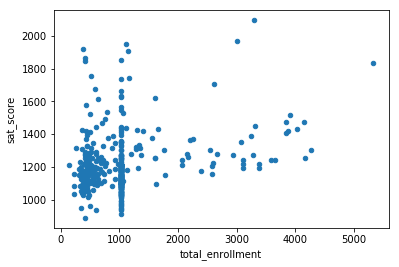

In [34]:
# Data exploration:
#    Relationship between number of students enrolled in school and SAT score
#    Using a scatter plot to compare total enrollment across schools to SAT scores across schools
%matplotlib inline

full.plot.scatter(x='total_enrollment', y='sat_score')

In [35]:
# This scatter plot shows a cluster on the bottom left with low total enrollment and low SAT scores
# Appears to only be a slight positive correlation between SAT scores and total enrollment

In [36]:
# Obtaining names of schools with low enrollment and low SAT scores
full[(full["total_enrollment"] < 1000) & (full["sat_score"] < 1000)]["School Name"]

78                                       NaN
88     KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
90     INTERNATIONAL SCHOOL FOR LIBERAL ARTS
155                MULTICULTURAL HIGH SCHOOL
Name: School Name, dtype: object

In [37]:
# Google searches show most of these schools are for students learning English, resulting in low enrollment
# Total enrollment is not correlated to SAT score
# SAT score is correlated to whether or not students are learning English as 2nd language or not

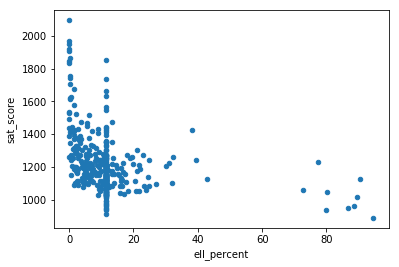

In [38]:
# Exploring relationships between language learners and SAT scores:
#    ell_percent column is percentage of students in each school learning English
#    Creating scatterplot of relationship
full.plot.scatter(x='ell_percent', y='sat_score')

In [39]:
# Group of schools with high ell_percentage also have low average SAT scores.
# Investigating at district level by figuring out percent of English language learners in each district then matching with map of SAT scores by district
show_district_map("ell_percent")

FileNotFoundError: [Errno 2] No such file or directory: 'schools/districts.geojson'

In [ ]:
# Comparing the two district level maps shows districts with low proportion of ELL learners tend to have high SAT scores and vice versa

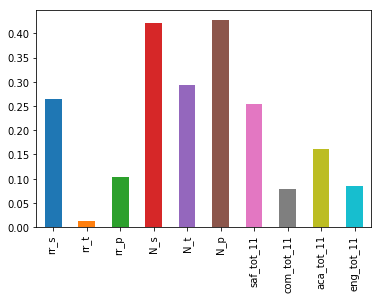

In [40]:
# Assuming results of student, parent, and teacher results correlate largely with SAT scores
# My theory is that schools with high academic expectations tend to have higher SAT scores
# Testing theory by plotting SAT scores and various survey metrics
full.corr()["sat_score"][["rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_tot_11", "com_tot_11", "aca_tot_11", "eng_tot_11"]].plot.bar()

In [ ]:
# Two factors that correlate the most are N_p (parents) and N_s (students) who responded to surveys
# Both correlate strongly with total enrollment, likely biased by ell_learners
# Another metric that correlates is saf_t_11 (how safe school is perceived to be)
# Safer school, more comfortable students feel learning
# Engagement, communication, academic expections did not correlate with SAT scores
# NYC could be asking wrong questions in surveys or considering wrong factors if SAT score improvement is the goal

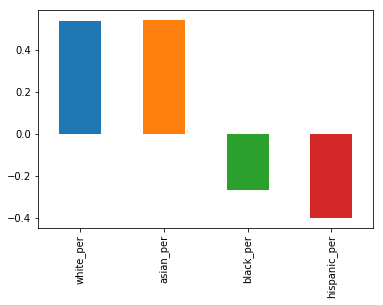

In [41]:
# Investigating race and SAT scores due to large correlation differential
full.corr()["sat_score"][["white_per", "asian_per", "black_per", "hispanic_per"]].plot.bar()

In [42]:
# Higher percentage of white/asian students correlate with higher SAT scores
# Higher percentages of black/hispanic students correlate with lower SAT scores
# For hispanic students, could be caused by recent immigrants who are ELL learners
# Mapping hispanic percentage by district to see the correlation
show_district_map("hispanic_per")

FileNotFoundError: [Errno 2] No such file or directory: 'schools/districts.geojson'

In [ ]:
# Shows some correlation with ELL percentage, but information needed

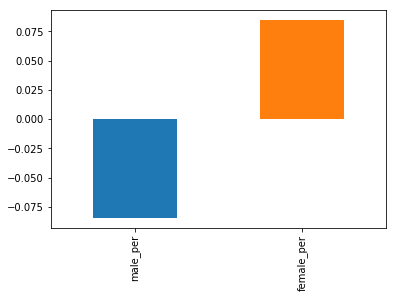

In [43]:
# Exploring gender differences in SAT scores
# Higher percentage of females in a school correlate with higher SAT scores
# Visualizing per bar graph
full.corr()["sat_score"][["male_per", "female_per"]].plot.bar()

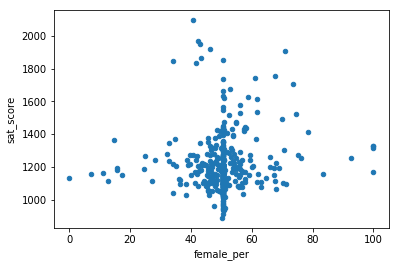

In [44]:
# Creating scatterplot of female_per and sat_score for more information
full.plot.scatter(x='female_per', y='sat_score')

In [46]:
# Shows a cluster of schools with high percentage of females and very high SAT scores (top right)
# Getting names of schools in cluster
full[(full["female_per"] > 65) & (full["sat_score"] > 1400)]["School Name"]

10            PROFESSIONAL PERFORMING ARTS HIGH SCH
14                    ELEANOR ROOSEVELT HIGH SCHOOL
22                     TALENT UNLIMITED HIGH SCHOOL
35             FIORELLO H. LAGUARDIA HIGH SCHOOL OF
185                     TOWNSEND HARRIS HIGH SCHOOL
212    FRANK SINATRA SCHOOL OF THE ARTS HIGH SCHOOL
Name: School Name, dtype: object

In [ ]:
# Google searches show that these are elite schools focused on performing arts
# These schools tend to have higher percentages of females and higher SAT scores
# Likely accounts for correlation between higher female percentages and SAT scores
# Likely accounts for inverse correlation between higher male percentages and lower SAT scores

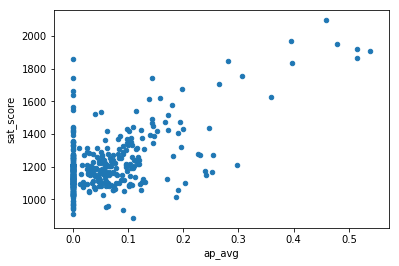

In [47]:
# Investigating relationship between students taking Advanced Placement exams and higher SAT scores
# Students who are high academic achievers tend to do better on SATs
full["ap_avg"] = full["AP Test Takers "] / full["total_enrollment"]

full.plot.scatter(x='ap_avg', y='sat_score')

In [48]:
# Shows strong correlation between the two
# Top right cluster of schools have high SAT scores and high proportion of students who take AP exams
# Obtaining names of high schools
full[(full["ap_avg"] > .3) & (full["sat_score"] > 1700)]["School Name"]

14             ELEANOR ROOSEVELT HIGH SCHOOL
20                    STUYVESANT HIGH SCHOOL
99              BRONX HIGH SCHOOL OF SCIENCE
103    HIGH SCHOOL OF AMERICAN STUDIES AT LE
122           BROOKLYN TECHNICAL HIGH SCHOOL
185              TOWNSEND HARRIS HIGH SCHOOL
202    QUEENS HIGH SCHOOL FOR THE SCIENCES A
223      STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: School Name, dtype: object

In [ ]:
# Searching Google shows these are highly selective schools where testing is required for admission
# Likely why these schools have higher proportions of AP test takers